<a href="https://colab.research.google.com/github/adhiraj4ai/Monte-Carlo/blob/main/GIBBS_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gibbs Sampling is algorithm to construct Monte Carlo Markov Chain. Gibbs sampling repeteadly samples from the conditional distribution of one variable of the progressive improving distribution π until algorithm converge to produce a target distribution.

Suppose p(x,y) is a p.d.f. or p.m.f of some hypothetical distribution which is unknown. Thus, we can't sample from this distribution. Then we should be able to sample from the conditional probability p(x|y) and p(y|x) such that

* x and y are set to some intial values
* then sample x|y, then sample y|x and so on.

Gibbs sampling assumes we can compute conditional distributions of one variable conditioned on all of the other variables and sample exactly from these distributions.

**Algorithm**
1. Initialize $x^{(t)} = (x_k^{(1)},...,x_k^{(n)})$ for t = 0.
2. For t = 1, 2, 3 .....

    2.1. Pick index i uniformly at random from 1...k.
    
    2.2. Draw a sample a∼p(x′i∣x(t)−i) where x(t)−i is the set of all variables in x(t) except for the ith variable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

In [ ]:
# No of samples
n = 15000

#starting point
x0 = 0
y0 = 0

In [ ]:
def gibbs(x, y):
    # Bucket to store data
    sample_x = []
    sample_y = []
    rho = 0.9
    for i in range(1, n):
        if i < 10000:
                continue

        sigma = np.sqrt(1 - rho **2)
        mean = x0 + rho * (y - y0)

        # obtain x from conditional distribution
        # x | y, y = N(x0 + rho(y - y0), 1 - rho^2)
        x = np.random.normal(mean, sigma)

        # Obtain mean for y
        mean = y0 + rho * (x - x0)

        # obtain x from conditional distribution
        # y | x, y = N(cy + rho(x - cx), 1 - rho^2)
        y = np.random.normal(mean, sigma)

        # save sample
        sample_x.append(x)
        sample_y.append(y)

    return [sample_x, sample_y)

In [ ]:
chain1 = gibbs(-1.5, 1.5)

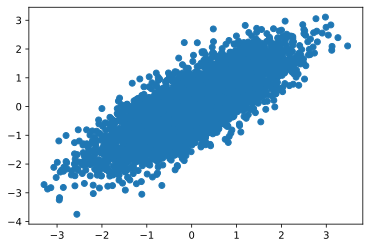

In [ ]:
plt.scatter(chain1[0], chain1[1])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


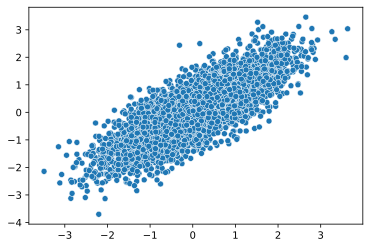

In [ ]:
chain2 = gibbs(1.5, -1.5)
sns.scatterplot(chain2[0], chain2[1])
plt.show()

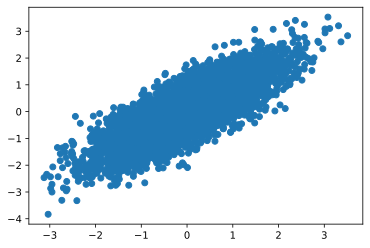

In [ ]:
chain3 = gibbs(1.5, 1.5)
plt.scatter(chain3[0], chain3[1])
plt.show()

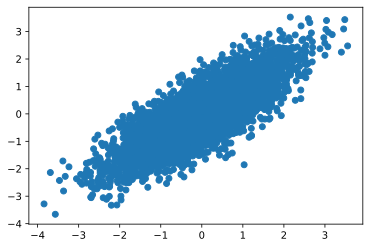

In [ ]:
chain4 = gibbs(-1.5, -1.5)
plt.scatter(chain4[0], chain4[1])
plt.show()

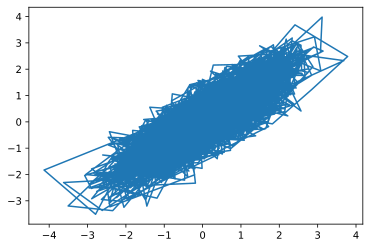

In [ ]:
chain5 = gibbs(0, 1.5)
plt.plot(chain5[0], chain5[1])
plt.show()

In [ ]:
plt.scatter(chain1[0], chain1[1])
plt.scatter(chain2[0], chain2[1])
plt.scatter(chain3[0], chain3[1])
plt.scatter(chain4[0], chain4[1])
plt.scatter(chain5[0], chain5[1])